Цель работы – изучение основных методов пространственной обработки цифровых изображений. Приобретение навыков использования градационных преобразований, пространственной фильтрации, операций над гистограммой изображения.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

1. Подготовить свой портрет в цифровом формате (полутоновое изображение с разрешением не более 800×800). Сохранить исходное изображение и его гистограмму в директорию «...DIP\Lab3».

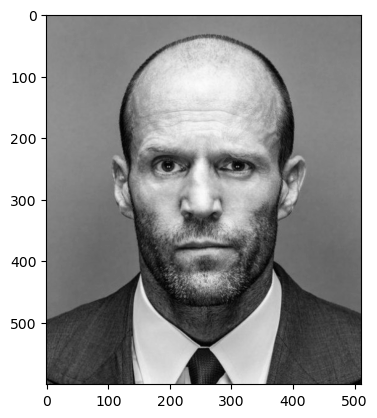

In [ ]:
%matplotlib inline
gray = cv2.imread("/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_1/gray.jpg"
                 , cv2.IMREAD_GRAYSCALE)

plt.imshow(gray, cmap='gray')

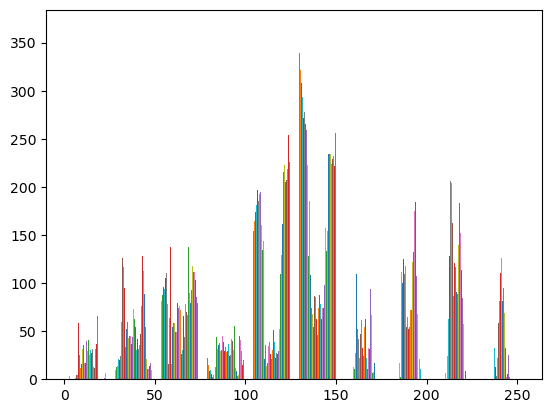

In [ ]:
plt.hist(gray)
plt.savefig('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/hist.png')

2. Выполнить логарифмическое преобразование исходного изображения. Сохранить полученное изображение и его гистограмму в директорию «...DIP\Lab3\Log».

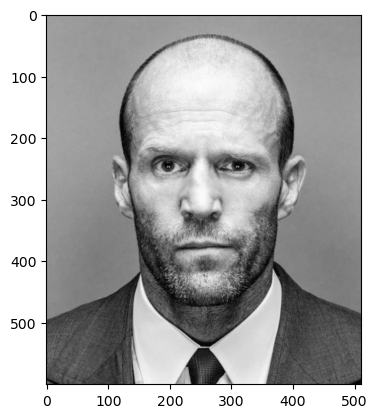

In [ ]:
def log_transform(image):
    img_float = image.astype(np.float32)/255
    logor = 255 * np.log(img_float+1)
    logor = logor.clip(0,255).astype(np.uint8)
    return logor

gray_log = log_transform(gray)
plt.imshow(gray_log, cmap="gray")

# gray_log = np.copy(gray)
# for i in range(gray_log.shape[0]):
#     for j in range(gray_log.shape[1]):
#         gray_log[i, j] = int(round(np.log(gray_log[i, j]+1),0))
# plt.imshow(gray_log, cmap="gray")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Log/gray_log.png', gray_log)

True

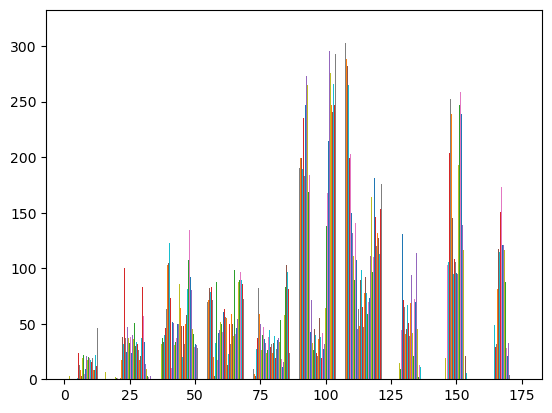

In [ ]:
plt.hist(gray_log)
plt.savefig('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Log/hist_log.png')

3. Выполнить степенное преобразование исходного изображения для значений γ = 0.1, 0.45, 5 . Сохранить полученные изображения и их гистограммы при каждом значении γ в директорию «...DIP\Lab3\Degree».

In [ ]:
def pow_transform(image, gam):
    img_float = image.astype(np.float32)/255
    pow = 255 * np.power(img_float, gam)
    pow = pow.clip(0,255).astype(np.uint8)
    return pow

gray_g1 = pow_transform(gray, 0.1)
gray_g2 = pow_transform(gray, 0.45)
gray_g3 = pow_transform(gray, 5)

Text(0.5, 1.0, 'gamma = 5')

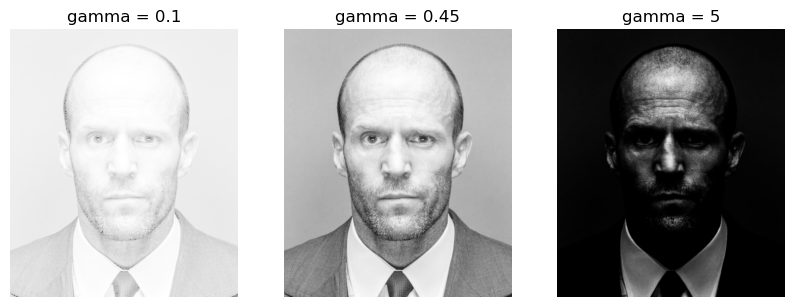

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)

# showing image
plt.imshow(gray_g1, cmap="gray")
plt.axis('off')
plt.title("gamma = 0.1")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)

# showing image
plt.imshow(gray_g2, cmap="gray")
plt.axis('off')
plt.title("gamma = 0.45")


# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)

# showing image
plt.imshow(gray_g3, cmap="gray")
plt.axis('off')
plt.title("gamma = 5")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Degree/gray_g1.png', gray_g1)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Degree/gray_g2.png', gray_g2)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Degree/gray_g3.png', gray_g3)

True

4. Выполнить операцию кусочно-линейного преобразования в соответствии с вариантом индивидуального задания. Сохранить полученное изображение и его гистограмму в директорию «...DIP\Lab3\Line_Contrast».

Мой вариант: 6, шум Гауссов

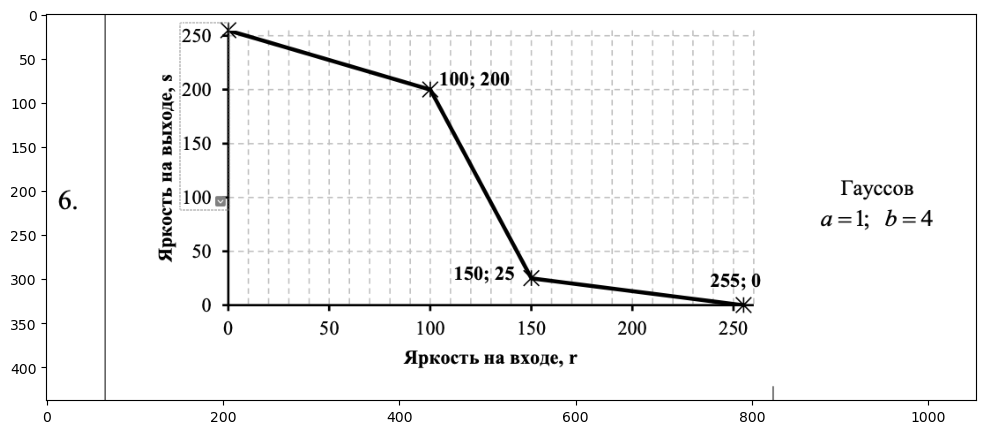

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.imread("/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/6 variant.png"
                 , cv2.IMREAD_GRAYSCALE), cmap="gray")

In [ ]:
k1 = (200-255) / (100-0)
k2 = (25-200) / (150-100)
k3 = (0-25) / (255-150)
b1 = 255
b2 = 200 - k2*100
b3 = 0 - k3*255

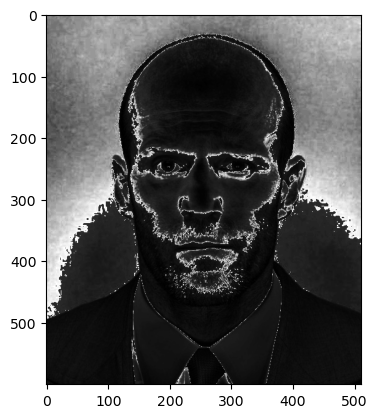

In [ ]:
gray_line = np.copy(gray)
for i in range(gray_line.shape[0]):
    for j in range(gray_line.shape[1]):
        if gray_line[i, j] >= 0 and gray_line[i, j] < 100:
            gray_line[i, j] = int(round(gray_line[i, j]*k1+b1,0))
        if gray_line[i, j] >= 100 and gray_line[i, j] < 150:
            gray_line[i, j] = int(round(gray_line[i, j]*k2+b2,0))
        if gray_line[i, j] >= 150 and gray_line[i, j] <= 255:
            gray_line[i, j] = int(round(gray_line[i, j]*k3+b3,0))
plt.imshow(gray_line, cmap="gray")

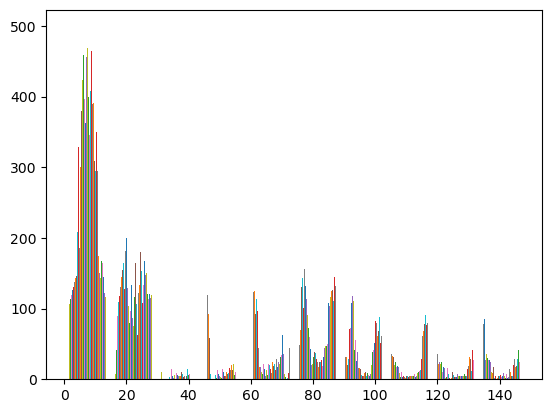

In [ ]:
plt.hist(gray_line)
plt.savefig('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Line_Contrast/hist_line.png')

5. Выполнить операцию эквализации гистограммы над исходным изображением. Сохранить полученное изображение и его гистограмму в директорию «...DIP\Lab3\Equaliz».

In [ ]:
# https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (number_bins-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return (image_equalized.reshape(image.shape)).astype(np.uint8)

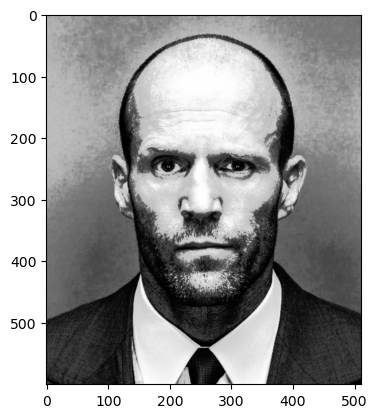

In [ ]:
gray_equaliz = image_histogram_equalization(gray)
plt.imshow(gray_equaliz, cmap="gray")

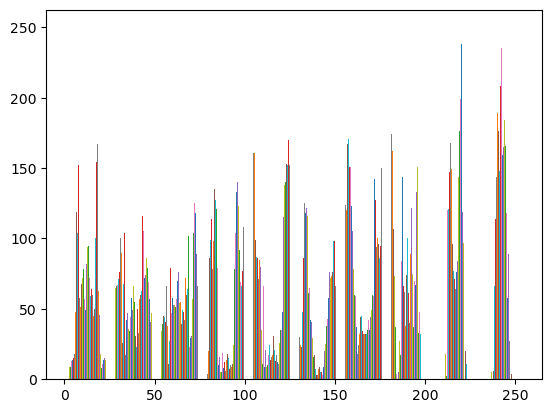

In [ ]:
plt.hist(gray_equaliz)
plt.savefig('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Equaliz/hist_equaliz.png')

6. Выполнить пространственную фильтрацию исходного изображения усредняющим фильтром с квадратной маской размерами 3, 15, 35. Сохранить полученные изображения в директорию «...DIP\Lab3\Filter».

In [ ]:
def mean_filter(gray_image, core):
    w, h = gray_image.shape
    new_img = np.copy(gray_image)
    for x in range(core, w-core, 1):
        for y in range(core, h-core, 1):
            setc = new_img[x:x+core, y:y+core]
            new_img[x, y] = np.mean(setc)
    return new_img[core:w-core, core:y-core]

In [ ]:
gray_mean_3 = mean_filter(gray, 3)
gray_mean_15 = mean_filter(gray, 15)
gray_mean_35 = mean_filter(gray, 35)

Text(0.5, 1.0, 'Mean filter 35x35')

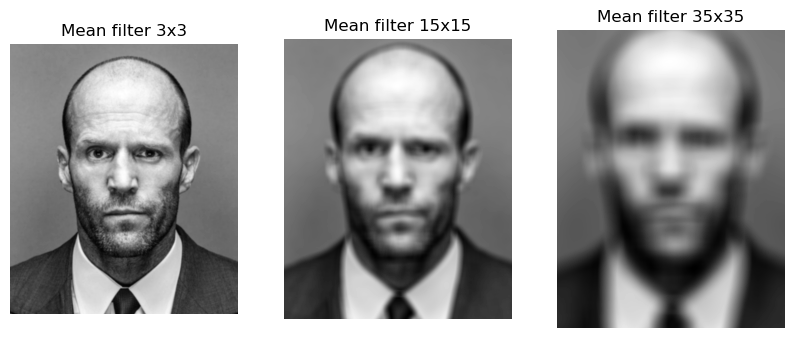

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)

# showing image
plt.imshow(gray_mean_3, cmap="gray")
plt.axis('off')
plt.title("Mean filter 3x3")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)

# showing image
plt.imshow(gray_mean_15, cmap="gray")
plt.axis('off')
plt.title("Mean filter 15x15")


# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)

# showing image
plt.imshow(gray_mean_35, cmap="gray")
plt.axis('off')
plt.title("Mean filter 35x35")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Filter/gray_mean_3.png', gray_mean_3)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Filter/gray_mean_15.png', gray_mean_15)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Filter/gray_mean_35.png', gray_mean_35)

True

8. Выполнить пространственную фильтрацию исходного изображения медианным фильтром с квадратной маской размерами 3, 9, 15. Сохранить полученное изображение в директорию «...DIP\Lab3\Median».

In [ ]:
def median_filter(gray_image, core):
    w, h = gray_image.shape
    new_img = np.copy(gray_image)
    for x in range(core, w-core, 1):
        for y in range(core, h-core, 1):
            setc = new_img[x:x+core, y:y+core]
            new_img[x, y] = np.median(setc)
    return new_img[core:w-core, core:y-core]

In [ ]:
gray_median_3 = median_filter(gray, 3)
gray_median_9 = median_filter(gray, 9)
gray_median_15 = median_filter(gray, 15)

Text(0.5, 1.0, 'Median filter 15x15')

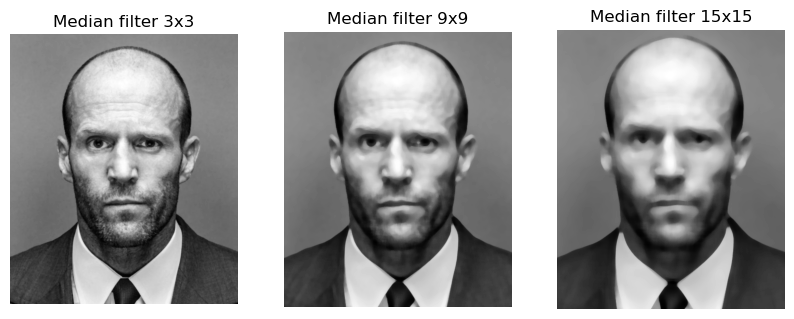

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)

# showing image
plt.imshow(gray_median_3, cmap="gray")
plt.axis('off')
plt.title("Median filter 3x3")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)

# showing image
plt.imshow(gray_median_9, cmap="gray")
plt.axis('off')
plt.title("Median filter 9x9")


# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)

# showing image
plt.imshow(gray_median_15, cmap="gray")
plt.axis('off')
plt.title("Median filter 15x15")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Median/gray_median_3.png', gray_median_3)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Median/gray_median_9.png', gray_median_9)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Median/gray_median_15.png', gray_median_15)

True

9. Выполнить операцию выделения границ исходного изображения методами Робертса, Превитта, Собеля. Сохранить полученные изображения в директорию «...DIP\Lab3\Edge».

In [ ]:
# https://www.geeksforgeeks.org/python-opencv-roberts-edge-detection/
from scipy import ndimage
gray_roberts = (np.copy(gray)).astype('float64')
gray_roberts/=255.0
roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )
vertical = ndimage.convolve( gray_roberts, roberts_cross_v )
horizontal = ndimage.convolve( gray_roberts, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
Roberts =(255*edged_img).astype('uint8')

In [ ]:
# https://russianblogs.com/article/41811117754/#5%20Prewitt%20算子
gray_prewitt = (np.copy(gray))
# Prewitt operator
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

x = cv2.filter2D(gray_prewitt, cv2.CV_16S, kernelx)
y = cv2.filter2D(gray_prewitt, cv2.CV_16S, kernely)

# Turn uint8, image fusion
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

In [ ]:
# https://russianblogs.com/article/41811117754/#6%20Sobel%20算子
# https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
gray_sobel = np.copy(gray)
# Оператор Собеля
x = cv2.Sobel (gray_sobel, cv2.CV_16S, 1, 0) # Найдите первую производную x
y = cv2.Sobel (gray_sobel, cv2.CV_16S, 0, 1) # Найдите первую производную y
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

Text(0.5, 1.0, 'Sobel')

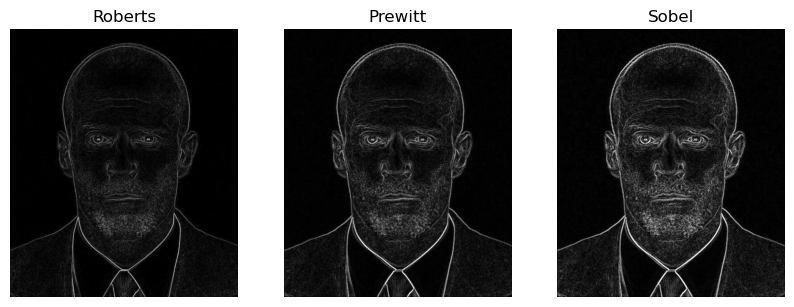

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)

# showing image
plt.imshow(Roberts, cmap="gray")
plt.axis('off')
plt.title("Roberts")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)

# showing image
plt.imshow(Prewitt, cmap="gray")
plt.axis('off')
plt.title("Prewitt")


# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)

# showing image
plt.imshow(Sobel, cmap="gray")
plt.axis('off')
plt.title("Sobel")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Edge/Roberts.png', Roberts)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Edge/Prewitt.png', Prewitt)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Edge/Sobel.png', Sobel)

True

10. Добавить на исходное изображение шум в соответствии с вариантом индивидуального задания. Подобрать фильтр и выполнить пространственную фильтрацию зашумленного изображения таким образом, чтобы дисперсия отфильтрованного изображения была близка к дисперсии исходного изображения. Сохранить зашумленное и фильтрованные изображения в директорию «...DIP\Lab3\Filter».

Мой вариант: 6.  Шум: Гауссов a=1; b=4

In [ ]:
import random

# Прочитать картинку и преобразовать ее в массив
gray_noisy = np.copy(gray)
# Установить смещение функции Гаусса (ср.знач.)
mu = 1 # a=1
# Установить стандартное отклонение функции Гаусса
sigma = 4 # b=4

# flatten im
flat = gray_noisy[:,:].flatten()

# Вычислить новое значение пикселя
for i in range(gray_noisy.shape[0]*gray_noisy.shape[1]):
    flat[i] = (flat[i] + random.gauss(mu,sigma)).clip(0,255).astype(np.uint8)

# reshape to original shape
gray_noisy[:,:] = flat.reshape([gray_noisy.shape[0],gray_noisy.shape[1]])

In [ ]:
print("Дисперсия исходного изображения:",np.var(gray.flatten()))
print("Дисперсия изображения с шумом:",np.var(gray_noisy.flatten()))
print("Дисперсия изображения с шумом, mean filter 3x3:",np.var(mean_filter(gray,3).flatten()))
print("Дисперсия изображения с шумом, mean filter 5x5:",np.var(mean_filter(gray,5).flatten()))
print("Дисперсия изображения с шумом, mean filter 9x9:",np.var(mean_filter(gray,9).flatten()))
print("Дисперсия изображения с шумом, median filter 3x3:",np.var(median_filter(gray,3).flatten()))
print("Дисперсия изображения с шумом, median filter 5x5:",np.var(median_filter(gray,5).flatten()))
print("Дисперсия изображения с шумом, median filter 9x9:",np.var(median_filter(gray,9).flatten()))

Дисперсия исходного изображения: 3144.705793360156
Дисперсия изображения с шумом: 3160.1318510038986
Дисперсия изображения с шумом, mean filter 3x3: 3132.128447195339
Дисперсия изображения с шумом, mean filter 5x5: 3105.218335855826
Дисперсия изображения с шумом, mean filter 9x9: 3053.8106697106205
Дисперсия изображения с шумом, median filter 3x3: 3170.8011694337006
Дисперсия изображения с шумом, median filter 5x5: 3184.745225167082
Дисперсия изображения с шумом, median filter 9x9: 3204.9736293819956


Таким образом, наименьшее отличие в дисперсии от исходного полутонового изображения имеет изображения с шумом после mean filter 3x3
Изобразим ниже изображения оригинала и отфильтрованного.

Text(0.5, 1.0, 'Filtered')

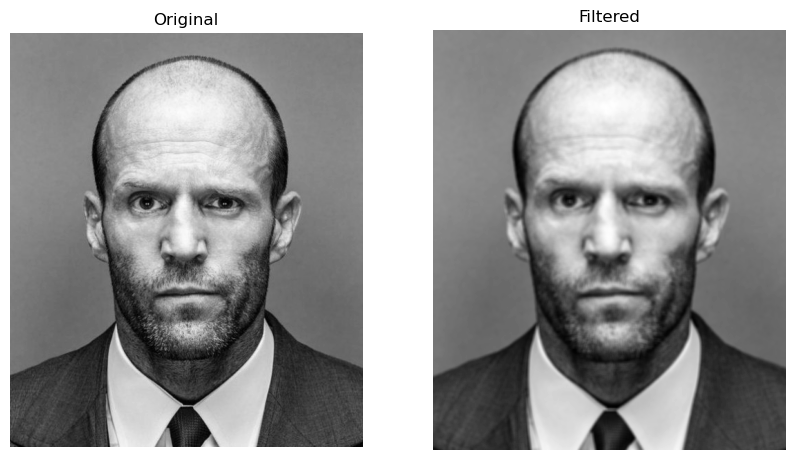

In [ ]:
gray_filtered = mean_filter(gray,5)
# create figure
fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)

# showing image
plt.imshow(gray_filtered, cmap="gray")
plt.axis('off')
plt.title("Filtered")

In [ ]:
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Filter/gray_noisy.png', gray_noisy)
cv2.imwrite('/Users/mikhail/Desktop/ИТМО/1 семестр/Цифровая обработка изображений/lab_3/Filter/gray_filtered.png', gray_filtered)


True